## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 1. Do smokers have higher insurance charges than non-smokers?

#### Null Hypothesis: There is no difference in charges for smoker and non-smokers.
#### Alternative Hypothesis: There is a difference in charges for smokers and non-smokers
#### For this test i will use t-test with numerical values and 2 groups


In [21]:
sample = df.sample(n=50,random_state=42)
smoker_charge = sample.loc[ sample['smoker']=='yes',"charges"]
non_smoker_charge = sample.loc[ sample['smoker']=='no',"charges"]
## Getting means for gender height
print(f"For smoker (n={len(smoker_charge)}): Mean={np.mean(smoker_charge):.2f}")
print(f"For non-smoker (n={len(non_smoker_charge)}): Mean={np.mean(non_smoker_charge):.2f}")

For smoker (n=11): Mean=35439.40
For non-smoker (n=39): Mean=7309.48


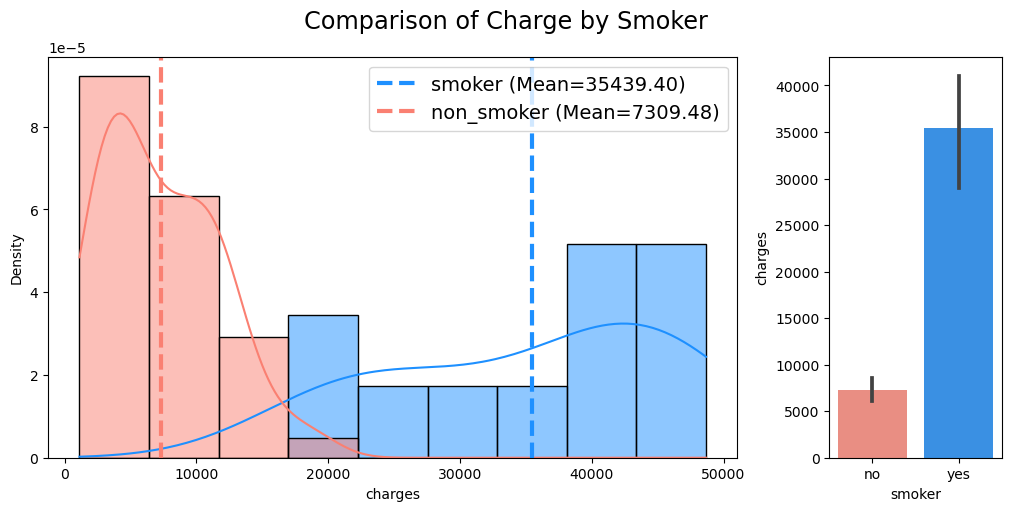

In [30]:
smoker_palette={'yes':'dodgerblue', "no":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker_charge), ls='--',lw=3, 
           label=f"smoker (Mean={np.mean(smoker_charge):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(non_smoker_charge), ls='--', lw=3, 
           label=f"non_smoker (Mean={np.mean(non_smoker_charge):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charge by Smoker',fontsize='xx-large');

#### Check Both Groups for Outliers

In [37]:
zscores_ns = stats.zscore(non_smoker_charge)
outliers_ns = abs(zscores_f)>3
np.sum(outliers_f)

0

In [38]:
zscores_s = stats.zscore(smoker_charge)
outliers_s = abs(zscores_m)>3
np.sum(outliers_m)

0

#### Check for Normality

In [33]:
result_s = stats.normaltest(smoker_charge)
result_s

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=2.209358578032982, pvalue=0.331317122245031)

In [34]:
result_ns = stats.normaltest(non_smoker_charge)
result_ns

NormaltestResult(statistic=2.6262187199374125, pvalue=0.26898239167805005)

#### Run Levene Test

In [35]:
result = stats.levene(smoker_charge, non_smoker_charge)
result

LeveneResult(statistic=18.397400827816167, pvalue=8.621214599569032e-05)

In [40]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charge, non_smoker_charge, equal_var = False)
result

Ttest_indResult(statistic=8.559207952113589, pvalue=3.4904271993679657e-06)

#### Reject the Null Hypothesis

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 2. Are men more likely to smoke than women?

##### Null Hypothesis: Probability of men being more likely to smoke than women
##### Alternative Hypothesis: 
##### For this test I will use Chi-Squared to compare 2 categorical columns

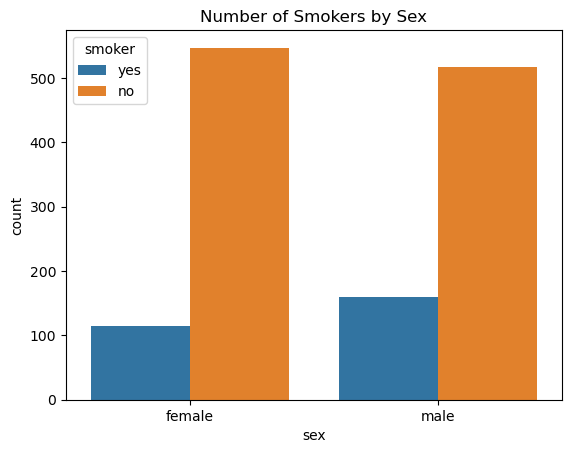

In [46]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

#### Contengency Table

In [47]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [48]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [49]:
print(p)
p<.05

0.006548143503580696


True

#### Reject the Null Hypothesis

#### 3. Do different regions have different charges, on average?

In [51]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Null Hypothesis: for ANOVA is that all group's means are the same. (There is no statistical difference between groups.)

#### Alternate Hypothesis: is that there is a difference in group's means. (There is a statistical difference between groups.)

#### I will use ANOVA More than 2 numerical data sets

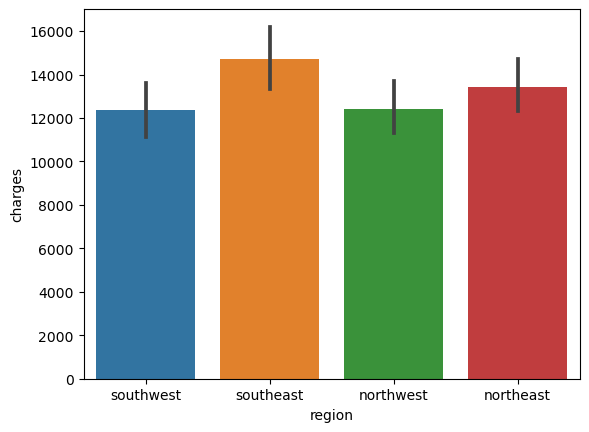

In [52]:
sns.barplot(data=df, x='region',y='charges');

In [53]:
## Create groups dictionary. There are only 4 groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [54]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [55]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df


,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [56]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [57]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

#### Reject Null Hypothesis